In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
idx = pd.IndexSlice

import datetime as dt
from datetime import date
from datetime import timedelta
import dateutil.parser as dup

%aimport trans.data
%aimport trans.gtrans
%aimport trans.reg
%aimport trans.regpipe
%aimport trans.pca

from trans.data import GetData
gd = GetData()
from trans.gtrans import *
from trans.reg import Reg, RegAttr
from trans.regpipe import RegPipe

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
residuals_file = "sector_residuals.pkl"
residuals_file = "sector_residuals_{}.pkl".format(dup.parse("02/28/2018").strftime("%Y%m%d"))
residuals_file

'sector_residuals_20180228.pkl'

In [4]:
sector_residuals = gd.load_data(residuals_file)

In [5]:
scale_pl = make_pipeline( SklearnPreproccessingTransformer( StandardScaler() ) )

scaled_df = scale_pl.fit_transform(sector_residuals)
    
scaled_df.head()

Error                                                    \
                 XLB       XLE       XLF       XLI       XLK       XLP   
Dt                                                                       
2017-08-29 -1.267245 -0.294920 -0.849623  1.597715  0.619651  0.644662   
2017-08-30  0.582329 -0.534029 -0.253758 -0.219857  0.295891 -0.520649   
2017-08-31  0.366117 -0.120517 -0.999323 -0.767451 -0.350550 -0.581231   
2017-09-01  1.138802  1.153297  0.165596 -0.195671 -0.658676  0.851778   
2017-09-05 -0.854611  1.727538 -2.440519 -0.821128 -0.124794  1.333760   

                                                              
                XLRE       XLU       XLV       XLY       XTL  
Dt                                                            
2017-08-29 -0.039047 -0.190933  0.239745 -0.608847  0.297138  
2017-08-30  0.398266 -0.453495  0.206929  0.611166 -0.223132  
2017-08-31  0.330280 -0.112850  2.453685 -0.303413 -0.826243  
2017-09-01  0.025367 -0.322937 -0.369247  0.695963  0.324480  
2017-09-05  0.624551  0.811454  0.605418  0.460404 -0.128842

In [6]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)
pca.__dict__
pca.components_.shape

,principal component 1,principal component 2
0,-0.609890,-0.293321
1,0.027888,0.517567
2,-1.006794,-0.430009
3,0.924632,-0.580885
4,-2.085322,-0.337845


{'components_': array([[ 0.25222441,  0.13745524,  0.42556254,  0.27590342, -0.28616915,
         -0.1768479 , -0.47210883, -0.45423497, -0.1308355 ,  0.26688844,
          0.17184655],
        [-0.16744332, -0.01216821, -0.12812096, -0.40114519,  0.60182963,
         -0.45848535, -0.14582819, -0.26891066, -0.26359745,  0.16585255,
          0.1774965 ]]),
 'copy': True,
 'explained_variance_': array([ 2.52230391,  1.77736203]),
 'explained_variance_ratio_': array([ 0.22930036,  0.16157837]),
 'iterated_power': 'auto',
 'mean_': array([ -5.28677631e-18,  -3.17206578e-17,   1.85037171e-17,
          3.52451754e-18,   7.04903508e-18,  -2.29093640e-17,
         -1.76225877e-18,  -5.28677631e-18,   2.46716228e-17,
         -2.29093640e-17,   7.48959977e-18]),
 'n_components': 2,
 'n_components_': 2,
 'n_features_': 11,
 'n_samples_': 126,
 'noise_variance_': 0.7444815630269157,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

(2, 11)

In [7]:

sectors =  { 
    "Consumer Discretionary": "XLY",
    "Consumer Staples": "XLP",
    "Energy": "XLE",
    "Financial": "XLF",
    "Health": "XLV",
    "Industrial": "XLI", 
    "Materials" : "XLB",
    "Real Estate": "XLRE",
    "Technology": "XLK", 
    "Telecom": "XTL",
    "Utilities": "XLU"
}

to_label = {}

for key, val in sectors.items():
    to_label[val] = key
    
to_label

{'XLB': 'Materials',
 'XLE': 'Energy',
 'XLF': 'Financial',
 'XLI': 'Industrial',
 'XLK': 'Technology',
 'XLP': 'Consumer Staples',
 'XLRE': 'Real Estate',
 'XLU': 'Utilities',
 'XLV': 'Health',
 'XLY': 'Consumer Discretionary',
 'XTL': 'Telecom'}

In [8]:
tickers = scaled_df.columns.get_level_values(1).tolist()
tickers = [ to_label[t] for t in tickers]

(array([  0.5,   4.5,   8.5,  12.5,  16.5,  20.5,  24.5,  28.5,  32.5,
         36.5,  40.5]), <a list of 11 Text xticklabel objects>)

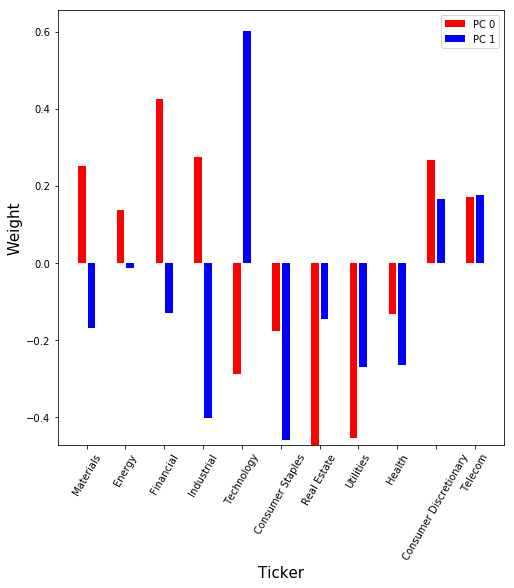

In [9]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Ticker', fontsize = 15)
ax.set_ylabel('Weight', fontsize = 15)

width = 1
ind = np.arange( len(tickers))
bars_pc0 = ax.bar( 4*ind, pca.components_[0], color="r")
bars_pc1 = ax.bar( 4*ind + width, pca.components_[1], color="b")

ax.set_xticks(4*ind + width / 2)
ax.set_xticklabels(tickers)
plt.xticks(rotation=60)
ax.legend( (bars_pc0, bars_pc1), [ "PC {:d}".format(i) for i in np.arange(2)])

In [10]:
sector_residuals.head()

Error                                                    \
                 XLB       XLE       XLF       XLI       XLK       XLP   
Dt                                                                       
2017-08-29 -0.005811 -0.002179 -0.004842  0.005931  0.002665  0.003375   
2017-08-30  0.002670 -0.003945 -0.001446 -0.000816  0.001272 -0.002726   
2017-08-31  0.001679 -0.000890 -0.005695 -0.002849 -0.001507 -0.003043   
2017-09-01  0.005222  0.008520  0.000944 -0.000726 -0.002832  0.004459   
2017-09-05 -0.003919  0.012762 -0.013908 -0.003048 -0.000537  0.006983   

                                                              
                XLRE       XLU       XLV       XLY       XTL  
Dt                                                            
2017-08-29 -0.000274 -0.001471  0.001135 -0.002442  0.002079  
2017-08-30  0.002798 -0.003494  0.000980  0.002451 -0.001562  
2017-08-31  0.002321 -0.000870  0.011621 -0.001217 -0.005782  
2017-09-01  0.000178 -0.002488 -0.001749  0.002791  0.002271  
2017-09-05  0.004388  0.006252  0.002867  0.001846 -0.000902

In [12]:
%aimport trans.pca
import trans.pca as pct

pco = pct.PrincipalComp(sector_residuals, )

pca_df = pco.singlePCA()

In [13]:
pca_df.head()
pca_df.index

Explained Var           Explained Var Ratio                PC 0  \
                       0         1                   0         1       XLB   
Dt                                                                           
2018-02-28      2.522304  1.777362              0.2293  0.161578  0.252224   

                                                                ...     \
                 XLE       XLF       XLI       XLK       XLP    ...      
Dt                                                              ...      
2018-02-28  0.137455  0.425563  0.275903 -0.286169 -0.176848    ...      

                PC 1                                                   \
                 XLE       XLF       XLI      XLK       XLP      XLRE   
Dt                                                                      
2018-02-28 -0.012168 -0.128121 -0.401145  0.60183 -0.458485 -0.145828   

                                                    
                 XLU       XLV       XLY       XTL  
Dt                                                  
2018-02-28 -0.268911 -0.263597  0.165853  0.177496  

[1 rows x 26 columns]

DatetimeIndex(['2018-02-28'], dtype='datetime64[ns]', name='Dt', freq=None)

PC 0      PC 1
Dt                                 
2018-02-28 XLB   0.252224 -0.167443
           XLE   0.137455 -0.012168
           XLF   0.425563 -0.128121
           XLI   0.275903 -0.401145
           XLK  -0.286169  0.601830
           XLP  -0.176848 -0.458485
           XLRE -0.472109 -0.145828
           XLU  -0.454235 -0.268911
           XLV  -0.130836 -0.263597
           XLY   0.266888  0.165853
           XTL   0.171847  0.177496

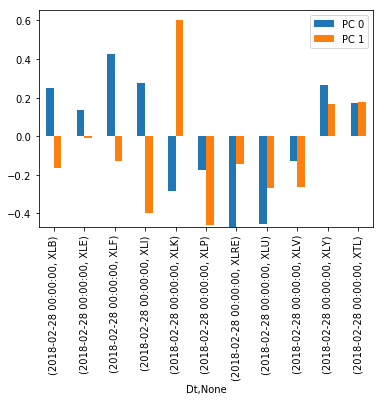

In [14]:
s_df = pca_df.loc[:, idx[ ["PC 0", "PC 1"],:]].stack()
s_df
s_df.plot.bar()